# Exploratory Data Analysis (EDA) for Real Estate Pricing

**Project By:** Shahrukh Shaikh  
**Organization:** NextHikes IT Solutions  

## Objective
To analyze housing data and identify key factors affecting house prices using EDA techniques.


## Problem Statement

Determining the optimal price of a house is challenging due to multiple
factors such as location, size, amenities, and market trends.

The objective of this project is to analyze these variables and
extract meaningful insights.


## Step1: Importing Required Libraries

These below libraries are used for data manipulation, visualization, and statistical analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Step2: Loading the Dataset

The dataset is loaded using Pandas for further analysis.

In [2]:
df = pd.read_csv("housing_data.csv")
df.head()


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


## Step 3: Basic Information

Checking rows, columns, datatypes, and missing values.


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum().sort_values(ascending=False).head(10)

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
dtype: int64

## Step 4: Data Cleaning

Handling missing values and duplicates.


In [10]:
# Dropping Duplicate Values

df.drop_duplicates(inplace=True)

# Fill numerical missing values with median

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorial missing values with mode

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df.isnull().sum().max()

if df.isnull().sum().max() == 0:
    print("Data is clean")
else:
    print("Data has missing values")


Data is clean


## Step 5: Univariate Analysis

Analyzing distribution of Sale Price.


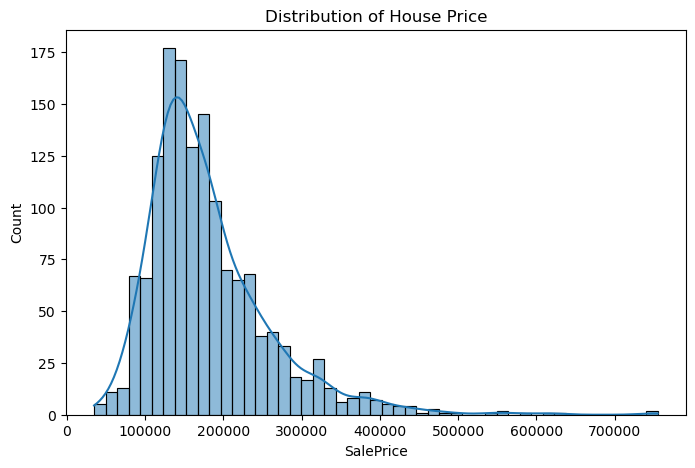

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of House Price")
plt.show()

**Explanation of above Histogram + KDE curve of house prices.**

•	This histogram shows how house prices are distributed in the dataset.

•	Most houses fall in the mid-price range, while very expensive houses are fewer.

•	The distribution is right-skewed, which means there are some high-priced luxury properties.

•	This helps in understanding market segments and setting appropriate pricing strategies.


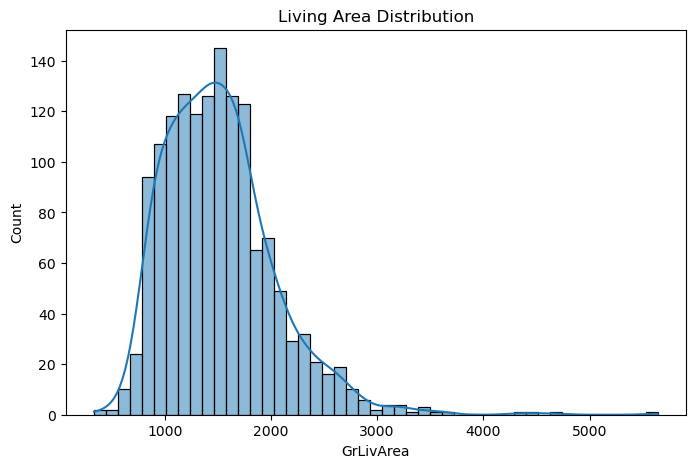

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["GrLivArea"], kde=True)
plt.title("Living Area Distribution")
plt.show()

**Living Area Distribution (Histogram Analysis)**

•	Shows how house prices are spread across the dataset

•	Most houses fall in the mid-price range

•	Fewer houses are in the high-price (luxury) segment

•	Distribution is right-skewed

•	KDE curve shows the overall pricing trend

•	Helps in identifying market segments and pricing strategy


## Step 6: Multivariate Analysis

Studying relationship between important variables.


**Price vs Living Area**

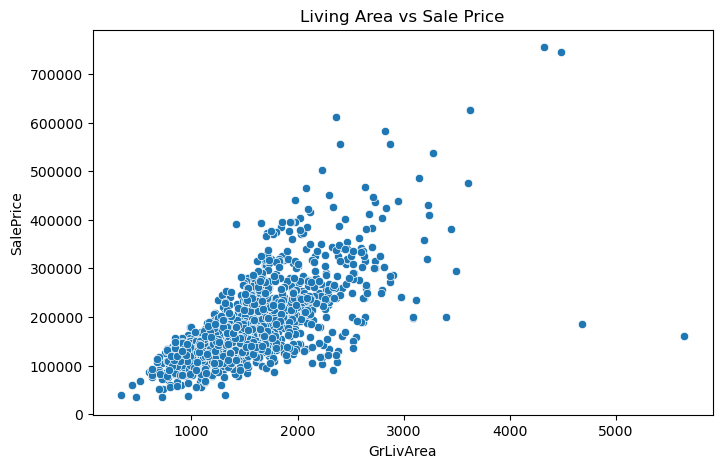

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("Living Area vs Sale Price")
plt.show()

**Relationship Between Living Area and Sale Price (Scatter Plot Analysis)**

•	This scatter plot shows the relationship between living area and house price.

•	Each point represents a house in the dataset.

•	As the living area increases, the sale price generally increases.

•	This indicates a positive correlation between house size and price.

•	Larger houses tend to have higher market value.

•	A few scattered points represent outliers, usually luxury or unusually priced properties.

•	This relationship helps in estimating house prices based on size and planning pricing strategies.




**Bedrooms vs Price**

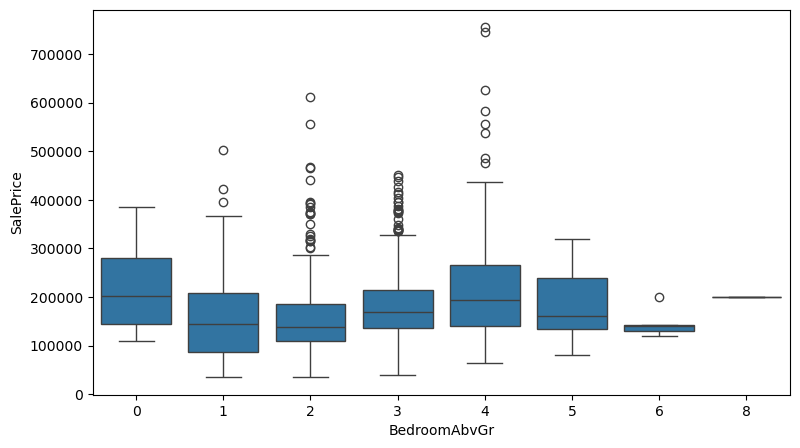

In [30]:
plt.figure(figsize=(9,5))
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df)
plt.show()

**Impact of Number of Bedrooms on Sale Price (Boxplot Analysis)**    

•	This boxplot shows how house prices vary with the number of bedrooms.

•	Each box represents the price distribution for a specific bedroom count.

•	Houses with more bedrooms generally have higher median sale prices.

•	This indicates that the number of bedrooms positively influences property value.

•	The spread of the boxes shows price variation within each category.

•	Dots outside the boxes represent outliers, usually premium or unusual properties.

•	This analysis helps understand customer preferences and supports better pricing decisions.





## Step 7: Correlation Analysis

Finding important features affecting price.


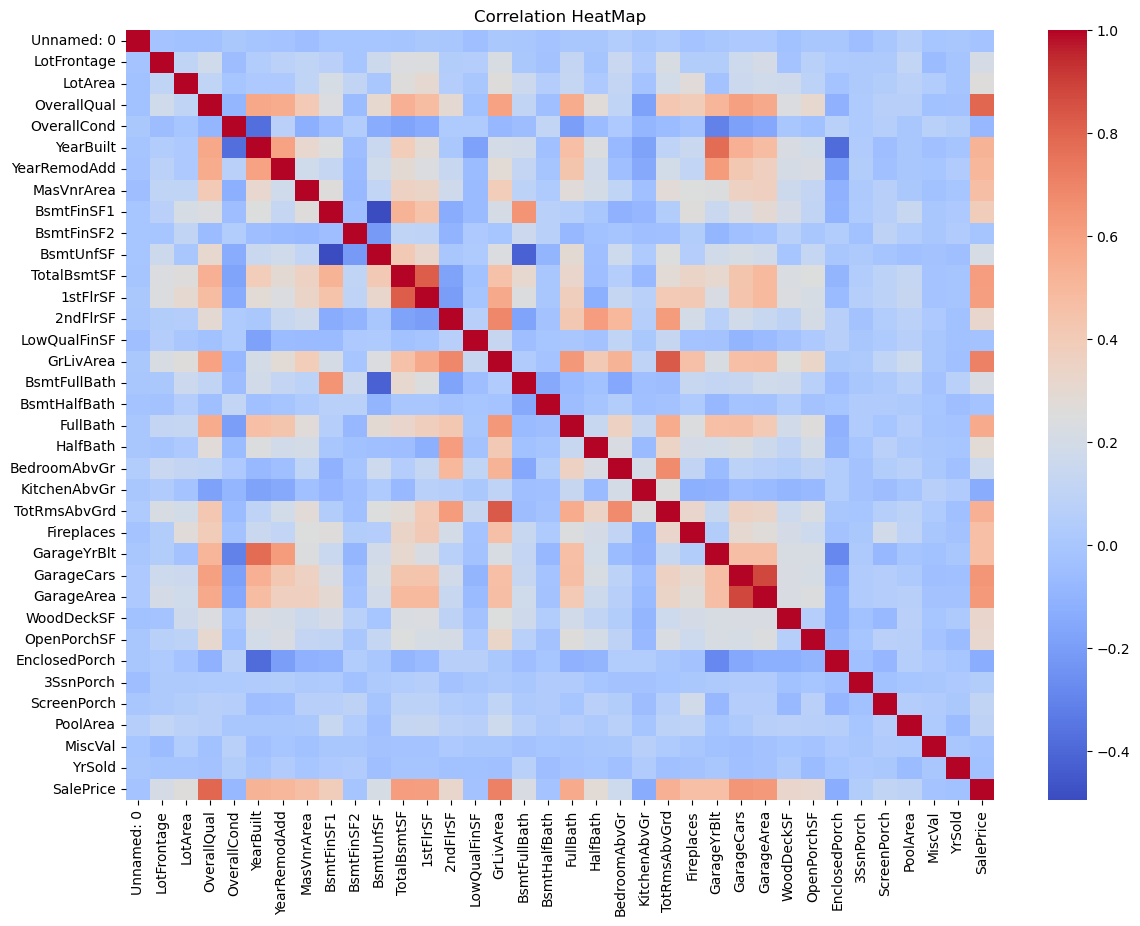

In [20]:
plt.figure(figsize=(14,10))

corr = df.select_dtypes(include=np.number).corr()

sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation HeatMap")
plt.show()

**Correlation Heatmap Analysis of Housing Features**

•	This heatmap shows the correlation between numerical variables in the dataset.

•	Each cell represents the strength and direction of the relationship between two features.

•	Warm colors indicate strong positive correlation, while cool colors indicate negative correlation.

•	SalePrice has strong positive correlation with features like GrLivArea, OverallQual, and GarageArea.

•	This means that larger size, better quality, and bigger garages increase house value.

•	Weak or near-zero correlations show features with little impact on price.

•	This analysis helps in identifying the most important variables for price prediction and decision-making.



## Step 8: Outlier Detection

Detecting extreme values in price and area.


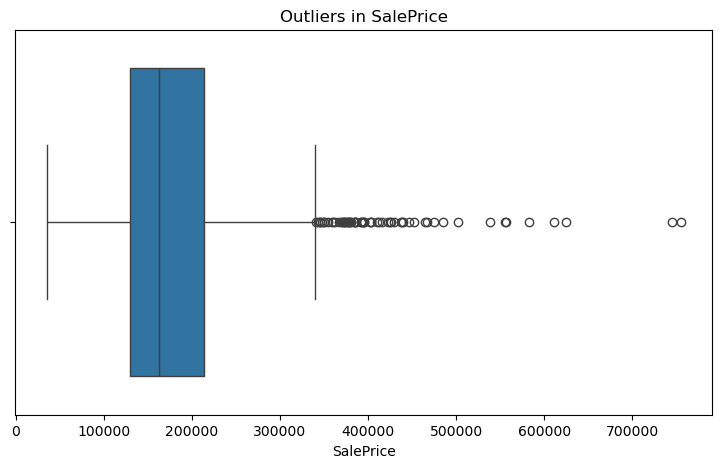

In [23]:
plt.figure(figsize=(9,5))
sns.boxplot(x=df["SalePrice"])
plt.title("Outliers in SalePrice")
plt.show()

**Detection of Outliers in House Prices (Boxplot Analysis)**

•	This boxplot shows the overall distribution of house prices in the dataset.

•	The central box represents the middle 50% of house prices (interquartile range).

•	The line inside the box indicates the median sale price.

•	Points outside the whiskers represent outliers, which are unusually high or low-priced houses.

•	Most outliers appear on the higher price side, indicating luxury or premium properties.

•	These outliers can significantly affect average price and model performance.

•	Identifying them helps in better data understanding and improving pricing strategies.




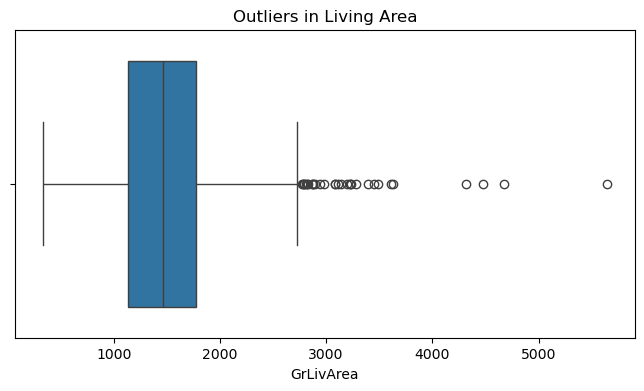

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["GrLivArea"])
plt.title("Outliers in Living Area")
plt.show()


**Detection of Outliers in Living Area (Boxplot Analysis)**

•	This boxplot shows the distribution of living area (GrLivArea) across all houses.

•	The box represents the middle 50% of living area values.

•	The line inside the box indicates the median living area.

•	Points outside the whiskers represent outliers, which are unusually large houses.

•	Most outliers appear on the higher side, indicating very large or luxury properties.

•	These properties may have higher prices and can influence analysis results.

•	Identifying such outliers helps in improving data quality and building more accurate pricing models.



## Step 9: Key Findings and Business Insights

### Observations:
1. SalePrice increases with living area.
2. Overall quality has strong impact on price.
3. Newer houses have higher valuation.
4. Neighborhood plays major role.
5. Outliers represent luxury properties.

### Business Recommendations:
- Focus on high-quality construction
- Improve amenities
- Target premium neighborhoods
- Use data-driven pricing
